In [1]:
# finds spark module // so its ready to use.
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql import SQLContext
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType


spark = SparkSession.builder.getOrCreate()
# no header as will add own one
schema = StructType([
    StructField("Status", StringType(), True),
    StructField("Power_range_sensor_1", DoubleType(), True),
    StructField("Power_range_sensor_2", DoubleType(), True),
    StructField("Power_range_sensor_3", DoubleType(), True),
    StructField("Power_range_sensor_4", DoubleType(), True),
    StructField("Pressure_sensor_1", DoubleType(), True),
    StructField("Pressure_sensor_2", DoubleType(), True),
    StructField("Pressure_sensor_3", DoubleType(), True),
    StructField("Pressure_sensor_4", DoubleType(), True),
    StructField("Vibration_sensor_1", DoubleType(), True),
    StructField("Vibration_sensor_2", DoubleType(), True),
    StructField("Vibration_sensor_3", DoubleType(), True),
    StructField("Vibration_sensor_4", DoubleType(), True),


])


df = spark.read.csv("nuclear_plants_small_dataset.csv", header=False, schema=schema )

               
df.printSchema()



root
 |-- Status: string (nullable = true)
 |-- Power_range_sensor_1: double (nullable = true)
 |-- Power_range_sensor_2: double (nullable = true)
 |-- Power_range_sensor_3: double (nullable = true)
 |-- Power_range_sensor_4: double (nullable = true)
 |-- Pressure_sensor_1: double (nullable = true)
 |-- Pressure_sensor_2: double (nullable = true)
 |-- Pressure_sensor_3: double (nullable = true)
 |-- Pressure_sensor_4: double (nullable = true)
 |-- Vibration_sensor_1: double (nullable = true)
 |-- Vibration_sensor_2: double (nullable = true)
 |-- Vibration_sensor_3: double (nullable = true)
 |-- Vibration_sensor_4: double (nullable = true)



In [3]:
df.show(1, vertical = True)

-RECORD 0----------------------
 Status               | Status 
 Power_range_sensor_1 | null   
 Power_range_sensor_2 | null   
 Power_range_sensor_3 | null   
 Power_range_sensor_4 | null   
 Pressure_sensor_1    | null   
 Pressure_sensor_2    | null   
 Pressure_sensor_3    | null   
 Pressure_sensor_4    | null   
 Vibration_sensor_1   | null   
 Vibration_sensor_2   | null   
 Vibration_sensor_3   | null   
 Vibration_sensor_4   | null   
only showing top 1 row



### Checking for empty or Nan VALUES

In [3]:
from pyspark.sql.functions import col,isnan, when, count, rand

#slect null values
df.na.drop("all")





DataFrame[Status: string, Power_range_sensor_1: double, Power_range_sensor_2: double, Power_range_sensor_3: double, Power_range_sensor_4: double, Pressure_sensor_1: double, Pressure_sensor_2: double, Pressure_sensor_3: double, Pressure_sensor_4: double, Vibration_sensor_1: double, Vibration_sensor_2: double, Vibration_sensor_3: double, Vibration_sensor_4: double]

In [5]:
# show structure
df.show(5, truncate = False)

+------+--------------------+--------------------+--------------------+--------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3|Power_range_sensor_4|Pressure_sensor_1|Pressure_sensor_2|Pressure_sensor_3|Pressure_sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+--------------------+--------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+
|Status|null                |null                |null                |null                |null             |null             |null             |null             |null              |null              |null              |null              |
|Normal|4.5044              |0.7443 

### Seperating Normal and abnormal data into different df

In [5]:
# Seperate all Normal status values into new dataframe
dfNormal = df.filter(df.Status == 'Normal' )


# Seperate all Abnormal status values into new dataframe
dfAbnormal = df.filter(df.Status == 'Abnormal' )


#dfNormal.show(vertical=True)
#dfAbnormal.show(vertical=True)

### Getting maximum

In [6]:
# maximum
sensors = ["Power_range_sensor_", "Pressure_sensor_", "Vibration_sensor_"]
for x in sensors:
    i = 1
    print(f'NORMAL --MAX - {x}1-4\n')
    while i < 5:
        print(dfNormal.agg({x+ str(i): 'max'}).show(vertical=True))
        i += 1
    i = 1
    print(f'ABNORMAL --MAX - {x}1-4\n')
    while i < 5:

      print(dfAbnormal.agg({x+ str(i): 'max'}).show(vertical=True),'\n')
      i += 1



NORMAL --MAX - Power_range_sensor_1-4

-RECORD 0----------------------------
 max(Power_range_sensor_1) | 12.1298 

None
-RECORD 0----------------------------
 max(Power_range_sensor_2) | 11.9284 

None
-RECORD 0----------------------------
 max(Power_range_sensor_3) | 14.0982 

None
-RECORD 0----------------------------
 max(Power_range_sensor_4) | 16.3568 

None
ABNORMAL --MAX - Power_range_sensor_1-4

-RECORD 0------------------------------
 max(Power_range_sensor_1) | 10.923078 

None 

-RECORD 0----------------------------
 max(Power_range_sensor_2) | 10.1541 

None 

-RECORD 0----------------------------
 max(Power_range_sensor_3) | 15.7599 

None 

-RECORD 0------------------------------
 max(Power_range_sensor_4) | 17.235858 

None 

NORMAL --MAX - Pressure_sensor_1-4

-RECORD 0-------------------------
 max(Pressure_sensor_1) | 56.8562 

None
-RECORD 0------------------------
 max(Pressure_sensor_2) | 9.2212 

None
-RECORD 0-------------------------
 max(Pressure_sensor_3) | 1

### Getting Minimum

In [7]:
# min
sensors = ["Power_range_sensor_", "Pressure_sensor_", "Vibration_sensor_"]
for x in sensors:
    i = 1
    print(f'NORMAL --MIN - {x}1-4\n')
    while i < 5:

      print(dfNormal.agg({x+ str(i): 'min'}).show(vertical=True))
      i += 1
    i = 1
    print(f'ABNORMAL --MIN - {x}1-4\n')
    while i < 5:

      print(dfAbnormal.agg({x+ str(i): 'min'}).show(vertical=True))
      i += 1



NORMAL --MIN - Power_range_sensor_1-4

-RECORD 0---------------------------
 min(Power_range_sensor_1) | 0.0851 

None
-RECORD 0---------------------------
 min(Power_range_sensor_2) | 0.0403 

None
-RECORD 0---------------------------
 min(Power_range_sensor_3) | 4.3826 

None
-RECORD 0---------------------------
 min(Power_range_sensor_4) | 0.1547 

None
ABNORMAL --MIN - Power_range_sensor_1-4

-RECORD 0---------------------------
 min(Power_range_sensor_1) | 0.0082 

None
-RECORD 0---------------------------
 min(Power_range_sensor_2) | 0.3891 

None
-RECORD 0-----------------------------
 min(Power_range_sensor_3) | 2.583966 

None
-RECORD 0---------------------------
 min(Power_range_sensor_4) | 0.0623 

None
NORMAL --MIN - Pressure_sensor_1-4

-RECORD 0------------------------
 min(Pressure_sensor_1) | 0.0248 

None
-RECORD 0------------------------
 min(Pressure_sensor_2) | 0.0104 

None
-RECORD 0------------------------
 min(Pressure_sensor_3) | 0.0774 

None
-RECORD 0---------

### Getting mean

In [8]:
# mean
sensors = ["Power_range_sensor_", "Pressure_sensor_", "Vibration_sensor_"]
for x in sensors:
    i = 1
    print(f'NORMAL --MEAN - {x}1-4\n')
    while i < 5:

      print(dfNormal.agg({x+ str(i): 'mean'}).show(vertical=True))
      i += 1
    i = 1
    print(f'ABNORMAL --MEAN - {x}1-4\n')
    while i < 5:

      print(dfAbnormal.agg({x+ str(i): 'mean'}).show(vertical=True))
      i += 1


NORMAL --MEAN - Power_range_sensor_1-4

-RECORD 0--------------------------------------
 avg(Power_range_sensor_1) | 5.602452811244976 

None
-RECORD 0--------------------------------------
 avg(Power_range_sensor_2) | 6.844503413654616 

None
-RECORD 0--------------------------------------
 avg(Power_range_sensor_3) | 9.292054016064245 

None
-RECORD 0--------------------------------------
 avg(Power_range_sensor_4) | 8.701398192771098 

None
ABNORMAL --MEAN - Power_range_sensor_1-4

-RECORD 0--------------------------------------
 avg(Power_range_sensor_1) | 4.396694975903612 

None
-RECORD 0--------------------------------------
 avg(Power_range_sensor_2) | 5.914042891566265 

None
-RECORD 0--------------------------------------
 avg(Power_range_sensor_3) | 9.164170212851408 

None
-RECORD 0-------------------------------------
 avg(Power_range_sensor_4) | 6.00914597991968 

None
NORMAL --MEAN - Pressure_sensor_1-4

-RECORD 0------------------------------------
 avg(Pressure_sensor_

### Getting Variance

In [9]:
# variance
sensors = ["Power_range_sensor_", "Pressure_sensor_", "Vibration_sensor_"]
for x in sensors:
    i = 1
    print(f'NORMAL --Variance - {x}1-4\n')
    while i < 5:

      print(dfNormal.agg({x+ str(i): 'variance'}).show(vertical=True))
      i += 1
    i = 1
    print(f'ABNORMAL --Variance - {x}1-4\n')
    while i < 5:

      print(dfAbnormal.agg({x+ str(i): 'variance'}).show(vertical=True))
      i += 1


NORMAL --Variance - Power_range_sensor_1-4

-RECORD 0-------------------------------------------
 variance(Power_range_sensor_1) | 8.374354492436746 

None
-RECORD 0-------------------------------------------
 variance(Power_range_sensor_2) | 4.880531200853515 

None
-RECORD 0-------------------------------------------
 variance(Power_range_sensor_3) | 4.173688700195111 

None
-RECORD 0--------------------------------------------
 variance(Power_range_sensor_4) | 20.053993554020884 

None
ABNORMAL --Variance - Power_range_sensor_1-4

-RECORD 0-------------------------------------------
 variance(Power_range_sensor_1) | 6.201490118793131 

None
-RECORD 0-------------------------------------------
 variance(Power_range_sensor_2) | 5.392428867311033 

None
-RECORD 0-------------------------------------------
 variance(Power_range_sensor_3) | 8.654818018354874 

None
-RECORD 0--------------------------------------------
 variance(Power_range_sensor_4) | 14.280946623673312 

None
NORMAL --V

#### Converting Pyspark df to Pandas df

In [10]:
#import pandas for df
import pandas as pd 
import matplotlib.pyplot as plt

#converting PySpark df to Pandas df
PdfNormal = dfNormal.toPandas()
PdfAbnormal = dfAbnormal.toPandas()


### Getting Median

In [11]:
# median
sensors = ["Power_range_sensor_", "Pressure_sensor_", "Vibration_sensor_"]
for x in sensors:
    i = 1
    print(f'\nNORMAL --Median - {x}1-4\n')
    while i < 5:

      print(x+str(i)+': ',PdfNormal['Vibration_sensor_'+str(i)].median())
      i += 1
    i = 1
    print(f'\nABNORMAL --Median - {x}1-4\n')
    while i < 5:

      print(x+str(i)+': ',PdfAbnormal['Vibration_sensor_'+str(i)].median())
      i += 1




NORMAL --Median - Power_range_sensor_1-4

Power_range_sensor_1:  7.4498999999999995
Power_range_sensor_2:  8.70075
Power_range_sensor_3:  16.4645
Power_range_sensor_4:  9.48545

ABNORMAL --Median - Power_range_sensor_1-4

Power_range_sensor_1:  6.53595
Power_range_sensor_2:  8.973099999999999
Power_range_sensor_3:  8.987269000000001
Power_range_sensor_4:  8.137599999999999

NORMAL --Median - Pressure_sensor_1-4

Pressure_sensor_1:  7.4498999999999995
Pressure_sensor_2:  8.70075
Pressure_sensor_3:  16.4645
Pressure_sensor_4:  9.48545

ABNORMAL --Median - Pressure_sensor_1-4

Pressure_sensor_1:  6.53595
Pressure_sensor_2:  8.973099999999999
Pressure_sensor_3:  8.987269000000001
Pressure_sensor_4:  8.137599999999999

NORMAL --Median - Vibration_sensor_1-4

Vibration_sensor_1:  7.4498999999999995
Vibration_sensor_2:  8.70075
Vibration_sensor_3:  16.4645
Vibration_sensor_4:  9.48545

ABNORMAL --Median - Vibration_sensor_1-4

Vibration_sensor_1:  6.53595
Vibration_sensor_2:  8.9730999999999

### Getting Mode

In [12]:
# mode
sensors = ["Power_range_sensor_", "Pressure_sensor_", "Vibration_sensor_"]
for x in sensors:
    i = 1
    print(f'\nNORMAL --Mode - {x}1-4\n')
    while i < 5:

      print(x+str(i)+': ',PdfNormal['Power_range_sensor_'+str(i)].mode()[0])
      i += 1
    i = 1
    print(f'\nABNORMAL --Mode - {x}1-4\n')
    while i < 5:

      print(x+str(i)+': ',PdfAbnormal['Power_range_sensor_'+str(i)].mode()[0])
      i += 1




NORMAL --Mode - Power_range_sensor_1-4

Power_range_sensor_1:  3.1577
Power_range_sensor_2:  4.6701
Power_range_sensor_3:  10.5588
Power_range_sensor_4:  1.2506

ABNORMAL --Mode - Power_range_sensor_1-4

Power_range_sensor_1:  0.1273
Power_range_sensor_2:  1.976964
Power_range_sensor_3:  3.86886
Power_range_sensor_4:  3.528996

NORMAL --Mode - Pressure_sensor_1-4

Pressure_sensor_1:  3.1577
Pressure_sensor_2:  4.6701
Pressure_sensor_3:  10.5588
Pressure_sensor_4:  1.2506

ABNORMAL --Mode - Pressure_sensor_1-4

Pressure_sensor_1:  0.1273
Pressure_sensor_2:  1.976964
Pressure_sensor_3:  3.86886
Pressure_sensor_4:  3.528996

NORMAL --Mode - Vibration_sensor_1-4

Vibration_sensor_1:  3.1577
Vibration_sensor_2:  4.6701
Vibration_sensor_3:  10.5588
Vibration_sensor_4:  1.2506

ABNORMAL --Mode - Vibration_sensor_1-4

Vibration_sensor_1:  0.1273
Vibration_sensor_2:  1.976964
Vibration_sensor_3:  3.86886
Vibration_sensor_4:  3.528996


# Making box plots of the data

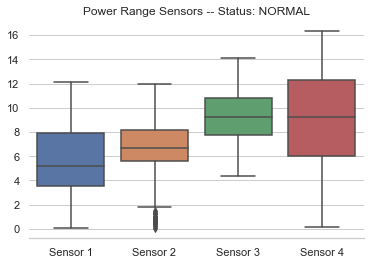

In [13]:
# Power range sensors

#import seaborn
import seaborn as sns

#set style for boxplot
sns.set_theme(style='whitegrid')

#Normal - POWER RANGE SENSORS
xN = PdfNormal[["Power_range_sensor_1", "Power_range_sensor_2", "Power_range_sensor_3", "Power_range_sensor_4"]].rename(columns={"Power_range_sensor_1" :"Sensor 1", "Power_range_sensor_2" : "Sensor 2", "Power_range_sensor_3" : "Sensor 3","Power_range_sensor_4" : "Sensor 4"})
sns.boxplot(data=xN).set_title('Power Range Sensors -- Status: NORMAL')
sns.despine(left=True)
plt.savefig('Boxplots/Power_range_sensors_Normal.png',dpi=180)


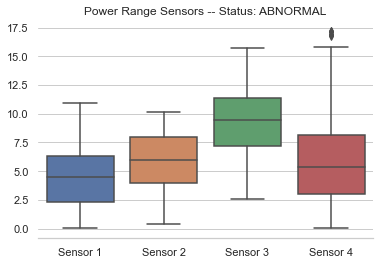

In [14]:
#AbNormal - POWER RANGE SENSORS
xA = PdfAbnormal[["Power_range_sensor_1", "Power_range_sensor_2", "Power_range_sensor_3", "Power_range_sensor_4"]].rename(columns={"Power_range_sensor_1" :"Sensor 1", "Power_range_sensor_2" : "Sensor 2", "Power_range_sensor_3" : "Sensor 3","Power_range_sensor_4" : "Sensor 4"})
sns.boxplot(data=xA).set_title('Power Range Sensors -- Status: ABNORMAL')
sns.despine(left=True)
plt.savefig('Boxplots/Power_range_sensors_Abnormal.png',dpi=180)

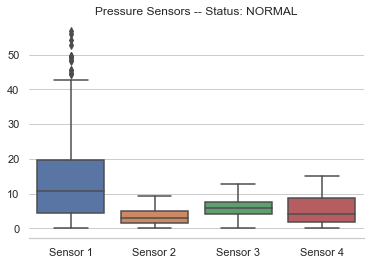

In [15]:
#Normal - PRESSURE SENSORS
xA = PdfNormal[["Pressure_sensor_1", "Pressure_sensor_2", "Pressure_sensor_3", "Pressure_sensor_4"]].rename(columns={"Pressure_sensor_1" :"Sensor 1", "Pressure_sensor_2" : "Sensor 2", "Pressure_sensor_3" : "Sensor 3", "Pressure_sensor_4" : "Sensor 4"})
sns.boxplot(data=xA).set_title('Pressure Sensors -- Status: NORMAL')
sns.despine(left=True)
plt.savefig('Boxplots/Pressure_sensors_Normal.png',dpi=180)

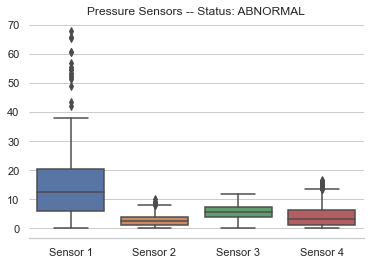

In [16]:
#Abnormal - PRESSURE SENSORS
xA = PdfAbnormal[["Pressure_sensor_1", "Pressure_sensor_2", "Pressure_sensor_3", "Pressure_sensor_4"]].rename(columns={"Pressure_sensor_1" :"Sensor 1", "Pressure_sensor_2" : "Sensor 2", "Pressure_sensor_3" : "Sensor 3", "Pressure_sensor_4" : "Sensor 4"})
sns.boxplot(data=xA).set_title('Pressure Sensors -- Status: ABNORMAL')
sns.despine(left=True)
plt.savefig('Boxplots/Pressure_sensors_Abnormal.png',dpi=180)

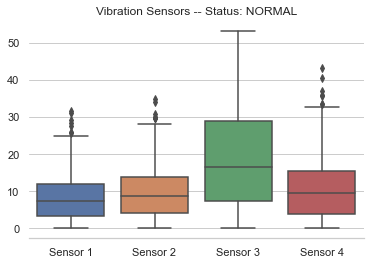

In [17]:
#Normal - VIBRATION SESNORS 
xA = PdfNormal[["Vibration_sensor_1", "Vibration_sensor_2", "Vibration_sensor_3", "Vibration_sensor_4"]].rename(columns={"Vibration_sensor_1" :"Sensor 1", "Vibration_sensor_2" : "Sensor 2", "Vibration_sensor_3" : "Sensor 3", "Vibration_sensor_4" : "Sensor 4"})
sns.boxplot(data=xA).set_title('Vibration Sensors -- Status: NORMAL')
sns.despine(left=True)
plt.savefig('Boxplots/Vibration_sensors_Normal.png',dpi=180)

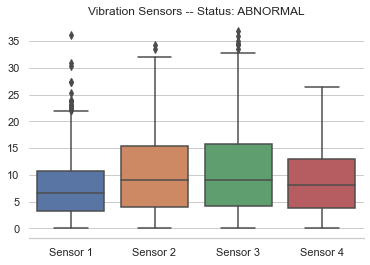

In [18]:
#Abnormal - VIBRATION SESNORS 
xA = PdfAbnormal[["Vibration_sensor_1", "Vibration_sensor_2", "Vibration_sensor_3", "Vibration_sensor_4"]].rename(columns={"Vibration_sensor_1" :"Sensor 1", "Vibration_sensor_2" : "Sensor 2", "Vibration_sensor_3" : "Sensor 3", "Vibration_sensor_4" : "Sensor 4"})
sns.boxplot(data=xA).set_title('Vibration Sensors -- Status: ABNORMAL')
sns.despine(left=True)
plt.savefig('Boxplots/Vibration_sensors_Abnormal.png',dpi=180)

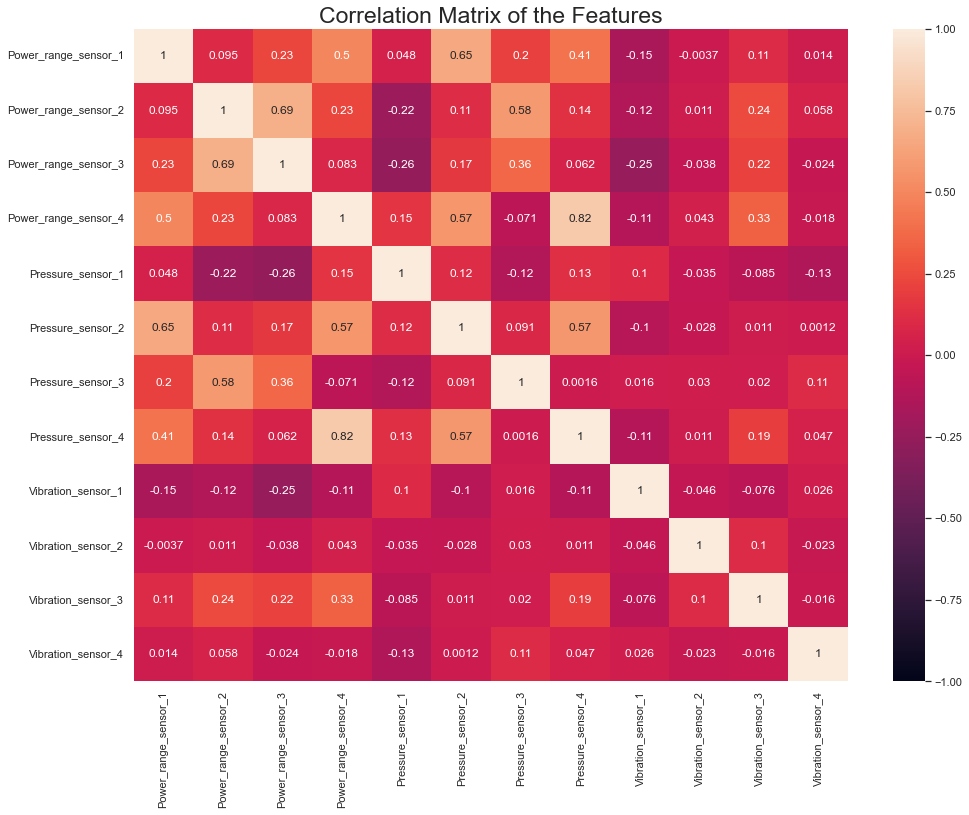

In [19]:
dfP = df.toPandas()
dfP = dfP.drop('Status', axis=1)
plt.figure(figsize=(16, 12))

ax = sns.heatmap(dfP.corr(), annot=True, vmin=-1, vmax=1)
ax.set_title("Correlation Matrix of the Features",fontsize = 23)
plt.savefig('CorrelationMatrix.png',dpi=120)








# Creating Networks to detect state of reactors

Instructions:
- Shuffle the data & split 
-    70% training set
-    30% test set

In [20]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import IntegerType

#convert to integer
for x in range(1, 5):

    df = df.withColumn('Power_range_sensor_'+str(x) , df['Power_range_sensor_'+str(x)].cast(IntegerType()))
    df = df.withColumn('Pressure_sensor_'+str(x) , df['Pressure_sensor_'+str(x)].cast(IntegerType()))
    df = df.withColumn('Vibration_sensor_'+str(x) , df['Vibration_sensor_'+str(x)].cast(IntegerType()))
    

In [21]:
df.printSchema()

root
 |-- Status: string (nullable = true)
 |-- Power_range_sensor_1: integer (nullable = true)
 |-- Power_range_sensor_2: integer (nullable = true)
 |-- Power_range_sensor_3: integer (nullable = true)
 |-- Power_range_sensor_4: integer (nullable = true)
 |-- Pressure_sensor_1: integer (nullable = true)
 |-- Pressure_sensor_2: integer (nullable = true)
 |-- Pressure_sensor_3: integer (nullable = true)
 |-- Pressure_sensor_4: integer (nullable = true)
 |-- Vibration_sensor_1: integer (nullable = true)
 |-- Vibration_sensor_2: integer (nullable = true)
 |-- Vibration_sensor_3: integer (nullable = true)
 |-- Vibration_sensor_4: integer (nullable = true)



### Forming each column into attribute

In [22]:
assembler = VectorAssembler(
    inputCols=[
 'Power_range_sensor_1',
 'Power_range_sensor_2',
 'Power_range_sensor_3',
 'Power_range_sensor_4',
 'Pressure_sensor_1',
 'Pressure_sensor_2',
 'Pressure_sensor_3',
 'Pressure_sensor_4',
 'Vibration_sensor_1',
 'Vibration_sensor_2',
 'Vibration_sensor_3',
 'Vibration_sensor_4'

    ],
    outputCol='features',
    

)
# used to skip null entires // needed as when fixing header names, it creates some null collum apart from status which could not be removed
assembler.setHandleInvalid("skip")

VectorAssembler_fe025a407b89

In [23]:
output = assembler.transform(df)


### string variable (Status) 

In [24]:
from pyspark.ml.feature import StringIndexer

In [25]:
indexer = StringIndexer(inputCol='Status', outputCol='StatusIndexer')

output_fixed = indexer.fit(output).transform(output)
#output_fixed.show(900)

In [26]:
df_final = output_fixed.select('features', 'StatusIndexer')

In [27]:
df_final.show(5, truncate=False)

+-----------------------------------------------------+-------------+
|features                                             |StatusIndexer|
+-----------------------------------------------------+-------------+
|[4.0,0.0,6.0,1.0,29.0,0.0,2.0,6.0,14.0,21.0,15.0,1.0]|1.0          |
|[4.0,0.0,5.0,1.0,27.0,1.0,1.0,5.0,20.0,0.0,14.0,7.0] |1.0          |
|[4.0,1.0,6.0,1.0,26.0,1.0,1.0,6.0,5.0,11.0,25.0,9.0] |1.0          |
|[5.0,1.0,7.0,0.0,25.0,2.0,2.0,6.0,1.0,1.0,28.0,4.0]  |1.0          |
|[5.0,0.0,7.0,0.0,24.0,3.0,4.0,5.0,0.0,9.0,34.0,13.0] |1.0          |
+-----------------------------------------------------+-------------+
only showing top 5 rows



Split dataset with 'df_final' dataframe

In [29]:
(trainingData, testData) = df_final.randomSplit([0.7, 0.3], seed=42)

# size of test data
testData.count()

255

In [30]:
# 1 == Normal

# size of training data
trainingData.filter(trainingData.StatusIndexer == '1').count()

366

In [31]:
# 0 == Abnormal
trainingData.filter(trainingData.StatusIndexer == '0').count()

375

In [32]:
# 1 == Normal
testData.filter(testData.StatusIndexer == '1').count()

132

In [33]:
# 0 == Abnormal
testData.filter(testData.StatusIndexer == '0').count()

123

Tree classifiers

In [35]:
from pyspark.ml.classification import DecisionTreeClassifier, MultilayerPerceptronClassifier, LinearSVC
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
# Neural network layers


Create models ( decision tree, Support vector, NN)

In [36]:
dtc = DecisionTreeClassifier(labelCol='StatusIndexer', featuresCol='features')
lsvc = LinearSVC(featuresCol='features', labelCol='StatusIndexer', maxIter=10, regParam=0.1)
nnc = MultilayerPerceptronClassifier(labelCol='StatusIndexer', featuresCol='features', layers=[12, 4, 4, 2], seed=123)


nnc.getBlockSize()
# Fit the models
lsvcModel = lsvc.fit(trainingData)
dtc_model = dtc.fit(trainingData)
nncModel = nnc.fit(trainingData)

In [38]:
# make predictions
dtc_pred = dtc_model.transform(testData)
lsv_pred = lsvcModel.transform(testData)
nnc_pred = nncModel.transform(testData)

Evaluate Models

In [39]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator


In [40]:
acc_eval = MulticlassClassificationEvaluator(labelCol='StatusIndexer', predictionCol='prediction', metricName='accuracy')

In [63]:
dtc_acc = acc_eval.evaluate(dtc_pred)
lsv_acc = acc_eval.evaluate(lsv_pred)
nnc_acc = acc_eval.evaluate(nnc_pred)

print("Model accuracies: \n")

print(f'Decision Tree Accuracy: {float("{0:.3f}".format(dtc_acc))*100}% ')
print(f'Learning Support Accuracy: {float("{0:.3f}".format(lsv_acc))*100}% ')
print(f'Neural Network Accuracy: {float("{0:.3f}".format(nnc_acc))*100}% ')

# float("{0:.3f}".format(nnc_acc)) <--- used to reduce decimal places for easy reading

Model accuracies: 

Decision Tree Accuracy: 82.0% 
Learning Support Accuracy: 74.1% 
Neural Network Accuracy: 76.5% 


Error rate of Decision Tree

In [62]:
err = (100 - dtc_acc*100)
print(f'Error rate: {err}%')

Error rate: 18.039215686274517%


In [64]:
#dtc_model.toDebugString


#### Confusion matrix

In [66]:
tp = dtc_pred[(dtc_pred.StatusIndexer == 1) & (dtc_pred.prediction == 1)].count()
tn = dtc_pred[(dtc_pred.StatusIndexer == 0) & (dtc_pred.prediction == 0)].count()
fp = dtc_pred[(dtc_pred.StatusIndexer == 0) & (dtc_pred.prediction == 1)].count()
fn = dtc_pred[(dtc_pred.StatusIndexer == 1) & (dtc_pred.prediction == 0)].count()

tp+tn+fp+fn # should add to total

255

### Accuracy, Error Rate, Specificity & Sensitivity for decision tree as highest accuracy

In [67]:
# DECISION TREE
tp = dtc_pred[(dtc_pred.StatusIndexer == 1) & (dtc_pred.prediction == 1)].count()
tn = dtc_pred[(dtc_pred.StatusIndexer == 0) & (dtc_pred.prediction == 0)].count()
fp = dtc_pred[(dtc_pred.StatusIndexer == 0) & (dtc_pred.prediction == 1)].count()
fn = dtc_pred[(dtc_pred.StatusIndexer == 1) & (dtc_pred.prediction == 0)].count()

#Accuracy, Error Rate, Specificity & Sensitivity
acc_r = ((tp + tn) / (tp+tn+fp+fn))*100
error_r = ((fp + fn) / (tp+tn+fp+fn))*100
specificity = (tn / (fn+tn))
sensitivity = (tp / (tp+fp))

print(f'Accuracy: {acc_r}%')
print(f'Error rate: {error_r}%')
print(f'Specificity: {specificity}')
print(f'sensitivity: {sensitivity}')

Accuracy: 81.96078431372548%
Error rate: 18.03921568627451%
Specificity: 0.7769784172661871
sensitivity: 0.8706896551724138


In [68]:
# SUPPORT VECTOR
tp = lsv_pred[(lsv_pred.StatusIndexer == 1) & (lsv_pred.prediction == 1)].count()
tn = lsv_pred[(lsv_pred.StatusIndexer == 0) & (lsv_pred.prediction == 0)].count()
fp = lsv_pred[(lsv_pred.StatusIndexer == 0) & (lsv_pred.prediction == 1)].count()
fn = lsv_pred[(lsv_pred.StatusIndexer == 1) & (lsv_pred.prediction == 0)].count()


#Accuracy, Error Rate, Specificity & Sensitivity
acc_r = ((tp + tn) / (tp+tn+fp+fn))*100
error_r = ((fp + fn) / (tp+tn+fp+fn))*100
specificity = (tn / (fn+tn))
sensitivity = (tp / (tp+fp))

print(f'Accuracy: {acc_r}%')
print(f'Error rate: {error_r}%')
print(f'Specificity: {specificity}')
print(f'sensitivity: {sensitivity}')

Accuracy: 74.11764705882354%
Error rate: 25.882352941176475%
Specificity: 0.696551724137931
sensitivity: 0.8


In [69]:
# ARTIFICIAL NEURAL NETWORK
tp = nnc_pred[(nnc_pred.StatusIndexer == 1) & (nnc_pred.prediction == 1)].count()
tn = nnc_pred[(nnc_pred.StatusIndexer == 0) & (nnc_pred.prediction == 0)].count()
fp = nnc_pred[(nnc_pred.StatusIndexer == 0) & (nnc_pred.prediction == 1)].count()
fn = nnc_pred[(nnc_pred.StatusIndexer == 1) & (nnc_pred.prediction == 0)].count()


#Accuracy, Error Rate, Specificity & Sensitivity
acc_r = ((tp + tn) / (tp+tn+fp+fn))*100
error_r = ((fp + fn) / (tp+tn+fp+fn))*100
specificity = (tn / (fn+tn))
sensitivity = (tp / (tp+fp))

print(f'Accuracy: {acc_r}%')
print(f'Error rate: {error_r}%')
print(f'Specificity: {specificity}')
print(f'sensitivity: {sensitivity}')

print(fn)

Accuracy: 76.47058823529412%
Error rate: 23.52941176470588%
Specificity: 0.7692307692307693
sensitivity: 0.7608695652173914
27


In [70]:
sensitivity = (tp / (tp+fp))
sensitivity

0.7608695652173914

## MapReduce nuclear_plants_Large_dataset.csv

### using Parallel programming to analyse larger dataset (1 million entries)

#### A dataset of this size, Pyspark would not be able to handle it. Needs GPU processing

- perform MapReduce using spark. 
- calculate Minimun, Maximum, Mean for every feature

- Mapper : splits individual sensor into int array values, 
- Reducer : merges two mapper objects as arguments

    

In [71]:
#MapReduce

#functions

def Map(x):
    return(x[0], 1)
    
def getMin(x, y):
    if x[0] < y[0]:
        return x
    else:
        return y
    
def getMax(x, y):
    if x[0] > y[0]:
        return x
    else:
        return y

def getMean(x, y):
    return((x[0]+y[0], x[1]+y[1]))

~atasetBig = spark.read.csv('nuclear_plants_big_dataset.csv', header=True, inferSchema=True).drop('Status')

minList = []
maxList = []
meanList = []

for i in datasetBig.columns:
    datasetBigRdd = (datasetBig.select(i)).rdd
    mapped = datasetBigRdd.map(Map)
    
    findMin = mapped.reduce(getMin)[0]
    minList.append(findMin)
    
    findMax = mapped.reduce(getMax)[0]
    maxList.append(findMax)
    
    ####  Map and Reduce mean // Not working
    #findMean = mapped.reduce(getMean)[0]
    #meanList.append(findMean[0] / findMean[1])

print('Min values: ')
for i in minList:
    
    print(str(i))
       
     

print('\nMax values: ')
for i in maxList:

    print(str(i))


## Print mean value, but not working
#print('Mean values: ')
#for i in meanList:
#    print(str(i))

Min values: 
0.085101889
0.040301865
4.382601524
0.154702541
0.024808914
0.010401445
0.077401972
0.005802369
0.009204939
0.027705465
0.06460834
0.083106768

Max values: 
12.12979591
11.92839597
14.0981967
16.3567945
56.85618071
9.221196874
12.64749573
15.10849487
31.49808931
34.86758818
53.23838196
43.23138536


In [90]:
for i in [0,1,2,3,4,5,6,7,8]:
    print(f'{minList[i]}')

0.085101889
0.040301865
4.382601524
0.154702541
0.024808914
0.010401445
0.077401972
0.005802369
0.009204939
